In [1]:
import torch
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv', index_col=False)
x = torch.tensor(df['age'], dtype=torch.float32)
y = torch.tensor(df['insurance'], dtype=torch.float32)
x = x.unsqueeze(0).view(-1, 1)
y = y.unsqueeze(0).view(-1, 1)

In [3]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [4]:
customdataset = CustomDataset()
dataloader_custom = DataLoader(customdataset,
                              batch_size=1,
                              shuffle=True)

In [5]:
class LinearReg(torch.nn.Module):
    def __init__(self):
        super(LinearReg, self).__init__()
        self.layer = torch.nn.Linear(1,10)
        self.layer2 = torch.nn.Linear(10,1)
        self.act = torch.nn.Sigmoid()
        
    def forward(self, x):
        out = self.layer(x)
        out = self.layer2(out)
        out = self.act(out)
        return out

In [6]:
linear_reg = LinearReg()
optimizer = torch.optim.Adam(linear_reg.parameters(), lr=0.008, betas=(0.9, 0.99))
loss_function = torch.nn.MSELoss()

In [7]:
for epoch in range(1000):
    for idx, (x1, y1) in enumerate(dataloader_custom):
        optimizer.zero_grad()
        pred = linear_reg(x1)
        lossval = loss_function(pred, y1)
        lossval.backward()
        optimizer.step()
        
    if epoch % 100:
        print("Loss: {}".format(lossval.item()))

Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 4.035036526521524e-16
Loss: 1.0
Loss: 6.849336093954494e-13
Loss: 1.0
Loss: 6.848487163653438e-13
Loss: 1.0
Loss: 1.3924997189129675e-15
Loss: 4.0310054437859818e-16
Loss: 1.0
Loss: 1.1667743852552019e-16
Loss: 1.0
Loss: 4.837976344458947e-29
Loss: 1.0
Loss: 1.0
Loss: 4.027776924767963e-16
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 4.824854141153486e-29
Loss: 1.0
Loss: 1.6578857291995805e-14
Loss: 1.0
Loss: 4.816652387929381e-29
Loss: 9.728560318444934e-11
Loss: 1.1625712489522484e-16
Loss: 4.01466194306871e-16
Loss: 4.8009870543176673e-29
Loss: 6.819901089173686e-13
Loss: 1.1602674516846147e-16
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.3816419211994699e-15
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.6445414027419468e-14
Loss: 1.3767174834023702e-15
Loss: 1.0
Loss: 1.0
Loss: 3.968601085490409e-16
Loss: 3.962640620519699e-16
Loss: 1.0
Loss: 1.0
Loss: 1.36330725778144e-15
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 9.570192555097279e-11


Loss: 1.0016170805136696e-18
Loss: 4.914467750402496e-20
Loss: 2.2076256307030935e-19
Loss: 1.0
Loss: 4.4856976351889434e-35
Loss: 1.9864227904119952e-17
Loss: 1.0
Loss: 9.692390599892361e-19
Loss: 4.324396908779271e-35
Loss: 1.0
Loss: 2.1215717051337292e-19
Loss: 1.7767250869740693e-15
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.7264151415554265e-15
Loss: 7.175276540462294e-13
Loss: 9.115898445706951e-19
Loss: 4.4412409531351764e-20
Loss: 1.0
Loss: 1.0
Loss: 1.8302787185944428e-17
Loss: 1.0
Loss: 1.6810853263501653e-15
Loss: 3.6482649559782727e-35
Loss: 4.3083763597135534e-20
Loss: 1.0
Loss: 1.9326121169657641e-19
Loss: 1.652675311903664e-15
Loss: 1.0
Loss: 8.624703088336478e-19
Loss: 1.0
Loss: 6.853268495234099e-13
Loss: 1.0
Loss: 3.3635559768174174e-35
Loss: 1.0
Loss: 1.0
Loss: 6.759359781963181e-13
Loss: 1.0
Loss: 3.2414936880568e-35
Loss: 6.704442231421359e-13
Loss: 1.0
Loss: 3.1589246804470754e-35
Loss: 1.569312976212856e-15
Loss: 1.6762489204225

Loss: 1.0
Loss: 2.8331887237645634e-19
Loss: 1.0
Loss: 1.0
Loss: 3.8858194189721397e-38
Loss: 1.0
Loss: 4.040216557693175e-36
Loss: 1.0
Loss: 3.8216662937171924e-38
Loss: 3.231556732277707e-13
Loss: 1.0
Loss: 5.88220670542617e-20
Loss: 1.0
Loss: 6.157994873807155e-18
Loss: 1.2390741484421708e-20
Loss: 1.235972463483167e-20
Loss: 6.128093949024588e-18
Loss: 1.0
Loss: 1.0
Loss: 6.411546014023278e-16
Loss: 1.2229252241279202e-20
Loss: 2.723102357967178e-19
Loss: 1.0
Loss: 6.370660263054905e-16
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 3.526814039164136e-38
Loss: 2.6805265963572494e-19
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 5.942113141640003e-18
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 3.5715495285443624e-36
Loss: 5.551852094522658e-20
Loss: 3.0997418716018077e-13
Loss: 3.537408247918002e-36
Loss: 5.837460732081632e-18
Loss: 1.1651841399625975e-20
Loss: 1.1629770863789868e-20
Loss: 3.483388887162318e-36
Loss: 1.0
Loss: 3.2679712315085274e-38
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 3.4056

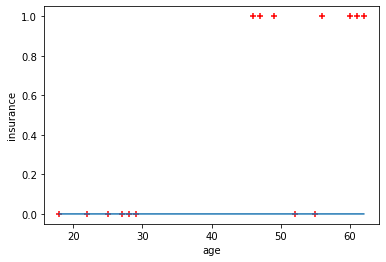

In [8]:
plt.xlabel('age')
plt.ylabel('insurance')
plt.scatter(df['age'], df['insurance'], color='red', marker='+')
x_s, _ = torch.sort(x, 0)
plt.plot(x_s.numpy(), linear_reg(x_s).detach().numpy())